In [139]:
import calfem.geometry as cfg
import calfem.mesh as cfm
import calfem.vis as cfv
import calfem.vis_mpl as cfvl
import numpy as np
from numba import njit

def mean_square(coords, polygons):
    
    S_el = lambda poly: ((coords[poly[1] - 1][0] - coords[poly[0] - 1][0]) * (coords[poly[2] - 1][1] - coords[poly[0] - 1][1]) - (coords[poly[2] - 1][0] - coords[poly[0] - 1][0]) * (coords[poly[1] - 1][1] - coords[poly[0] - 1][1])) / 2
    res = 0.
    for el in polygons:
        res += S_el(el)
    return round(res / len(polygons), 8)

def max_square(coords, polygons):
    
    S_el = lambda poly: ((coords[poly[1] - 1][0] - coords[poly[0] - 1][0]) * (coords[poly[2] - 1][1] - coords[poly[0] - 1][1]) - (coords[poly[2] - 1][0] - coords[poly[0] - 1][0]) * (coords[poly[1] - 1][1] - coords[poly[0] - 1][1])) / 2
    S_max = 0.
    tmp = 0.
    for el in polygons:
        tmp = S_el(el)
        if (tmp > S_max):
            S_max = tmp
    return round(S_max, 8)

### Define Geometry

In [140]:
g = cfg.Geometry()

g.point([0.0, 0.0]) # point 0
g.point([4.0, 0.0]) # point 1
g.point([4.0, 2.0]) # point 2
g.point([0.0, 2.0]) # point 2

g.spline([0, 1], marker=0) # line 0
g.spline([1, 2], marker=1) # line 1
g.spline([2, 3], marker=0) # line 2
g.spline([3, 0], marker=1) # line 3

g.surface([0, 1, 2, 3])


### Generate Mesh

In [141]:
def reshape_boundary_dict(bdofs):
    nodeset = set([0])
    for array in bdofs.items():
        nodeset.update(array[1])
    new = np.zeros(len(nodeset)-1)
    for key in bdofs:
        for elem in bdofs[key]:
            new[elem-1] = key
    return new

In [142]:
mesh = cfm.GmshMesh(g)
mesh.elType = 2          # Degrees of freedom per node.
mesh.dofsPerNode = 1     # Factor that changes element sizes.
mesh.elSizeFactor = 0.3325 # Element size Factor 
"""
    mesh.elSizeFactor = 0.3325  ~   max S_el = 0.05
    mesh.elSizeFactor = 0.1425  ~   max S_el = 0.01
    mesh.elSizeFactor = 0.042   ~   max S_el = 0.001
"""
coords, edof, dofs, bdofs, elementmarkers = mesh.create()

print("mean: ", mean_square(coords, edof))
print("max: ", max_square(coords, edof))
    
boundary_voltages = reshape_boundary_dict(bdofs)

flag = True
flag1 = True
count = 0
ind = len(boundary_voltages) 
ind_n = 0

for k in range(len(boundary_voltages)):
    i = len(boundary_voltages) - 1 - k
    if boundary_voltages[i] == 1.:
        ind_n = i
        boundary_voltages[i] = 0.
        if abs(ind_n - ind)!= 1:
            break
        ind = i
    else:
        boundary_voltages[i] = 10.
        count += 1

for k in range(len(boundary_voltages)):
    i = len(boundary_voltages) - 1 - k
    if boundary_voltages[i] == 1.:        
        boundary_voltages[i] = 0.
    
    
        

    

print(boundary_voltages)
print(count)
# print(bdofs)

Info    : GMSH -> Python-module
Info    : Reading '/tmp/tmpfsoncvlf/tempGeometry.geo'...
Info    : Done reading '/tmp/tmpfsoncvlf/tempGeometry.geo'
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Nurb)
Info    : [ 30%] Meshing curve 2 (Nurb)
Info    : [ 50%] Meshing curve 3 (Nurb)
Info    : [ 80%] Meshing curve 4 (Nurb)
Info    : Done meshing 1D (Wall 0.000245334s, CPU 0.00029s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.00245438s, CPU 0.002535s)
Info    : 129 nodes 260 elements
Info    : Writing '/tmp/tmpfsoncvlf/meshFile.msh'...
Info    : Done writing '/tmp/tmpfsoncvlf/meshFile.msh'
mean:  0.03703704
max:  0.045456
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.  0.  0.
  0.  0.  0.  0.]
12


In [143]:
# print(f"""x,y""")
# for i in reversed( range(32, 45) ):
#     print(f"""0.0, {coords[i][1]}""")

print(f"""x,y""")
for i in coords:
    print(f"""{i[0]}, {i[1]}""")

x,y
0.0, 0.0
4.0, 0.0
4.0, 2.0
0.0, 2.0
0.307692307955767, 0.0
0.6153846160050351, 0.0
0.9230769240743191, 0.0
1.230769232690708, 0.0
1.538461541176993, 0.0
1.846153849513157, 0.0
2.153846156961943, 0.0
2.461538463449961, 0.0
2.769230768957192, 0.0
3.076923075965624, 0.0
3.384615383567866, 0.0
3.692307691450333, 0.0
4.0, 0.2857142860766795
4.0, 0.5714285723888323
4.000000000000001, 0.8571428587567437
4.0, 1.142857144458645
4.0, 1.428571428590002
4.0, 1.714285713737412
3.692307692235968, 2.0
3.384615384205055, 2.0
3.076923075220044, 2.0
2.769230766221689, 2.0
2.461538457390136, 2.0
2.153846149672808, 2.0
1.846153841546819, 2.0
1.538461534970406, 2.0
1.230769227836879, 2.0
0.9230769209118538, 2.0
0.6153846137766594, 2.0
0.307692307357039, 2.0
0.0, 1.714285714112242
0.0, 1.428571427282776
0.0, 1.142857140812647
0.0, 0.8571428550023311
0.0, 0.57142856987971
0.0, 0.2857142850699596
3.725940663013569, 0.9772675718644818
0.285167092204119, 0.9732408017337097
2.614669674954395, 0.2553099045652

In [153]:
print(f"""p1,p2,p3""")
for i in edof:
    print(f"""{i[0]}, {i[1]}, {i[2]}""")

p1,p2,p3
35, 36, 108
82, 42, 83
41, 88, 89
35, 108, 124
41, 87, 88
88, 81, 89
42, 82, 84
89, 81, 107
83, 42, 113
83, 54, 114
54, 110, 114
55, 89, 107
107, 81, 119
84, 82, 95
54, 83, 113
49, 107, 119
51, 85, 86
95, 57, 106
51, 86, 109
85, 51, 90
49, 15, 112
109, 86, 129
84, 95, 106
87, 74, 88
46, 27, 103
108, 36, 115
33, 52, 56
96, 46, 103
85, 90, 99
74, 73, 88
82, 63, 95
90, 46, 99
86, 74, 87
80, 82, 83
80, 63, 82
44, 30, 91
51, 25, 90
50, 7, 92
72, 73, 74
46, 96, 99
33, 34, 52
73, 81, 88
72, 71, 73
44, 91, 102
48, 56, 57
48, 32, 56
85, 74, 86
30, 31, 91
73, 78, 81
24, 25, 51
14, 15, 49
6, 7, 50
75, 63, 80
43, 13, 93
27, 28, 103
61, 59, 63
32, 33, 56
69, 79, 94
14, 49, 93
25, 26, 90
73, 71, 78
31, 32, 48
26, 46, 90
70, 71, 72
7, 8, 92
8, 45, 92
63, 59, 95
96, 70, 99
70, 69, 71
59, 57, 95
57, 56, 106
31, 48, 91
28, 29, 105
61, 63, 75
68, 69, 70
13, 14, 93
68, 70, 96
48, 57, 58
72, 74, 85
10, 47, 97
9, 10, 97
26, 27, 46
10, 11, 47
45, 9, 97
8, 9, 45
47, 11, 98
11, 12, 98
29, 30, 44
12, 1

### Assemble Element Matrices

In [145]:
def Ke(coords, alpha_x, alpha_y):
    x1 = coords[0,0]
    x2 = coords[1,0]
    x3 = coords[2,0]
    y1 = coords[0,1]
    y2 = coords[1,1]
    y3 = coords[2,1]
    A = 1/2 * np.abs(x1*(y2 - y3) + x2 * (y3 - y1) + x3 * (y1 - y2))
    M11 = -(alpha_x * (y2 - y3) ** 2  + alpha_y * (x3 - x2) ** 2) / (4 * A)
    M12 = -(alpha_x * (y2 - y3) * (y3 - y1) + alpha_y * (x3 - x2) * (x1 - x3)) / (4 * A)
    M13 = -(alpha_x * (y2 - y3) * (y1 - y2) + alpha_y * (x3 - x2) * (x2 - x1)) / (4 * A)
    M22 = -(alpha_x * (y3 - y1) ** 2 + alpha_y * (x1 - x3) ** 2) / (4 * A)
    M23 = -(alpha_x * (y3 - y1) * (y1 - y2) + alpha_y * (x1 - x3) * (x2 - x1)) / (4 * A)
    M33 = -(alpha_x * (y1 - y2) ** 2 + alpha_y * (x2 - x1) ** 2) / (4 * A)
    return np.matrix(
        [
            [M11, M12, M13],
            [M12, M22, M23],
            [M13, M23, M33]
        ])

In [146]:
# import pandas as pd
# df_x_y = pd.read_csv("./domains/domain_2/mesh0005_test/mesh_nodes.csv")
# df_z = pd.read_csv("./output/domain_2_extra/mesh0005_test/Test_domain_2_rectangle_dirichlet_only_0005_test_solution.csv")
# df_elements = pd.read_csv("./domains/domain_2/mesh0005_test/mesh_polygons.csv")
# co = coords.copy()
# for i in range(len(df_x_y["x"].values)):
#     co[i][0] = df_x_y["x"].values[i]
#     co[i][1] = df_x_y["y"].values[i]

num_elem = len(edof)
num_nodes = len(dofs)

ke = np.zeros((num_elem, 3, 3))

for i in range(num_elem):
    ke[i] = Ke(coords[edof[i] - 1], 1, 1)


### Assemble Global Matrix

In [147]:
K = np.zeros((num_nodes, num_nodes))
for e in range(num_elem):
    for i in range(3):
        for j in range(3):
            K[edof[e,i] - 1, edof[e,j] - 1] += ke[e,i,j]

### Create RHS Vector

In [148]:
b = np.zeros(num_nodes)

### Introduce Boundary Conditions

In [149]:
for n in reversed (range(len(boundary_voltages))):
    for i in range(len(b)):
        if np.fabs(boundary_voltages[n]) > 1e-16:
            b[i] -= boundary_voltages[n]*K[i, n]
    b = np.delete(b, n, axis=0)
    K = np.delete(K, n, axis=0)
    K = np.delete(K, n, axis=1)

### Solve

In [150]:
x = np.linalg.solve(K,b)
v = np.zeros(num_nodes-len(x))
v = np.concatenate((boundary_voltages,x))

### Plot

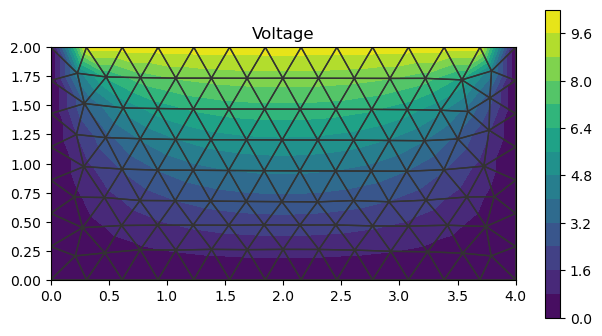

In [151]:
cfvl.figure(fig_size=(7.5, 4))
cfvl.draw_nodal_values_contourf(v, coords, edof, title="Voltage", dofs_per_node=mesh.dofs_per_node, el_type=mesh.el_type, draw_elements=True)
cfvl.colorbar()

In [152]:
import pandas as pd
df_x_y = pd.read_csv("./domains/domain_2/mesh005_test/mesh_nodes.csv")
df_z = pd.read_csv("./output/domain_2_extra/mesh005_test/Test_domain_2_rectangle_dirichlet_only_005_test_solution.csv")
df_elements = pd.read_csv("./domains/domain_2/mesh005_test/mesh_polygons.csv")
# for element in df_elements.values:
#     element -= 1;

co = coords.copy()
for i in range(len(df_x_y["x"].values)):
    co[i][0] = df_x_y["x"].values[i]
    co[i][1] = df_x_y["y"].values[i]

for k in co:
    print(f"{k[0]}, {k[1]}")

cfvl.figure(fig_size=(7.5, 4))
cfvl.draw_nodal_values_contourf(df_z["sol"].values, co, df_elements.values, title="Voltage", dofs_per_node=mesh.dofs_per_node, el_type=mesh.el_type, draw_elements=False)
cfvl.colorbar()


FileNotFoundError: [Errno 2] No such file or directory: './domains/domain_2/mesh005_test/mesh_nodes.csv'

In [ ]:
print(len(v))
print(len(coords))
print(len(edof))

from numba import njit

@njit()
def exact_solution(x, y, row_num_el: int = 50):
    res = 0
    for n in range(1, row_num_el + 1):
        res += 20 * (1 - (-1) ** n) / (np.pi * n) / (np.exp(- np.pi * n / 2 ) - np.exp( np.pi * n / 2 )) * (np.exp(- np.pi * n / 4 * y ) - np.exp( np.pi * n / 4 * y)) * np.sin(np.pi * n / 4 * x)
    if res > 10.:
        res = 10.
    return res

def print_mean_error(x, y ,z):
    error_in_node = [];
    for i in range(len(z)):
        error_in_node.append( np.fabs( z[i] - exact_solution(x[i], y[i]) ))
    print("Mean error: ", round(np.mean(error_in_node), 8))
    print("Max error: ", round(np.max(error_in_node), 8))

    # for i in range(len(error_in_node)):
    #     if error_in_node[i] > 0.2:
    #         print( x[i], y[i], error_in_node[i])



998
998
1874


In [ ]:
x = []
y = []
for i in range(len(coords)):
    x.append(coords[i][0])
    y.append(coords[i][1])


In [ ]:
print_mean_error(x, y, v)

Mean error:  0.00777009
Max error:  0.61644325
